In [3]:
import numpy as np  #numercial calculations


In [4]:
import pandas as pd #to get data to frames

In [5]:
import matplotlib.pyplot as plt # for graphs

In [6]:
import seaborn as sns  #for graphs

In [7]:
%matplotlib inline  
#to get chart directly below the codeset

In [8]:
!ls

MiniMLProject.ipynb
WA_Fn-UseC_-Telco-Customer-Churn.csv


In [9]:
telco_customer_churn_data =pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [10]:
telco_customer_churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
telco_customer_churn_data.info()  #to get details about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
telco_customer_churn_data.isnull()  # chcking for null values..not graphical..use seaborn for this

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

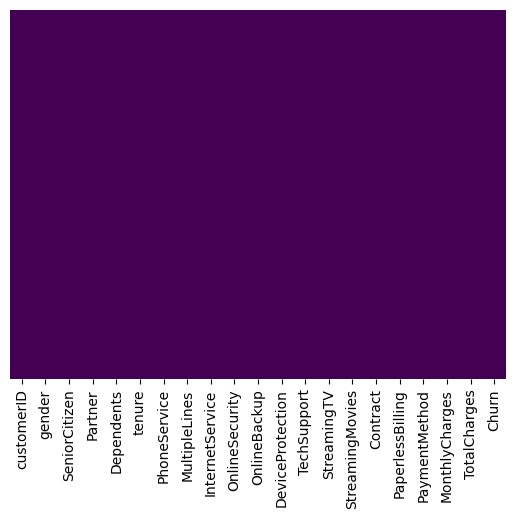

In [13]:
sns.heatmap(telco_customer_churn_data.isnull(),yticklabels=False,cbar=False,cmap ='viridis')

<Axes: xlabel='Churn', ylabel='count'>

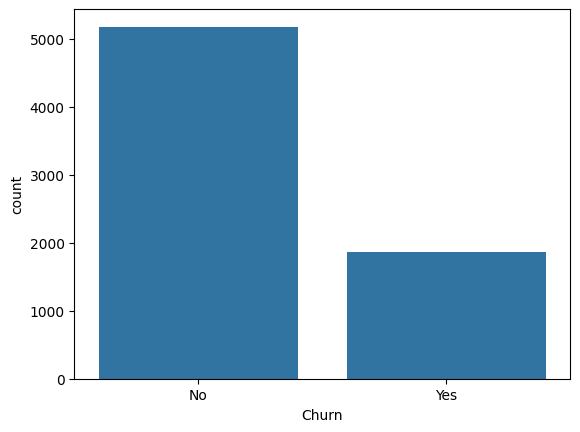

In [14]:
sns.countplot(x='Churn',data =telco_customer_churn_data)

<Axes: xlabel='Churn', ylabel='count'>

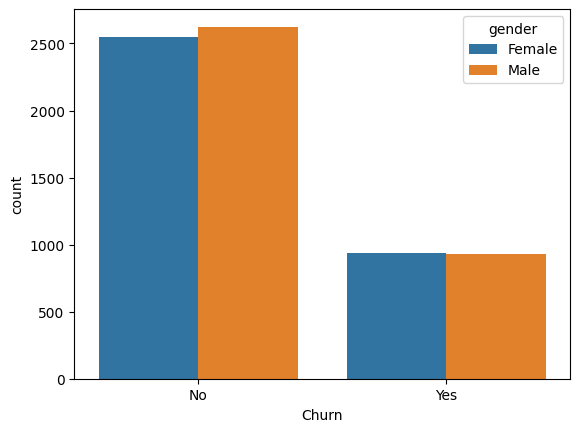

In [15]:
sns.countplot(x='Churn',data =telco_customer_churn_data,hue ='gender')

<Axes: xlabel='Churn', ylabel='count'>

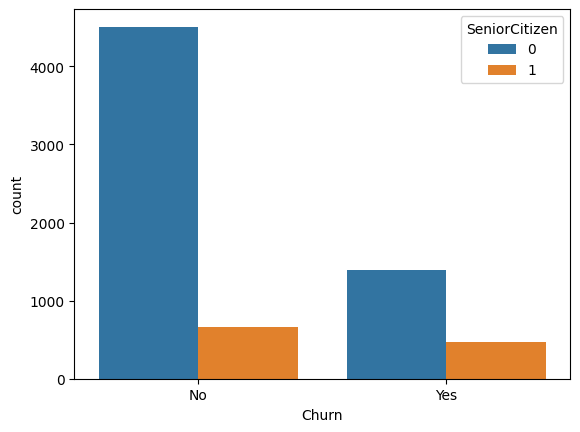

In [16]:
sns.countplot(x='Churn',data =telco_customer_churn_data,hue ='SeniorCitizen')

<Axes: xlabel='Churn', ylabel='count'>

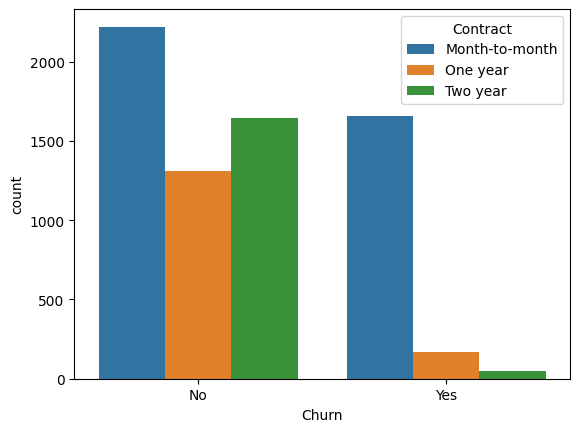

In [17]:
sns.countplot(x='Churn',data =telco_customer_churn_data,hue ='Contract')

Data Preprocessing

In [18]:
yes_no_mapping ={'Yes':1,'No':0}  # yes no values are changed to 1s and 0s
telco_customer_churn_data['Partner']=telco_customer_churn_data['Partner'].map(yes_no_mapping)
telco_customer_churn_data['Dependents']=telco_customer_churn_data['Dependents'].map(yes_no_mapping)
telco_customer_churn_data['PhoneService']=telco_customer_churn_data['PhoneService'].map(yes_no_mapping)


In [19]:
telco_customer_churn_data.head(10)
telco_customer_churn_data.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,0,0,38,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,0,0,67,1,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,0,0,19,1,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,0,0,12,0,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,0,0,72,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,0,0,66,1,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [20]:
InternetServiceMapping = {'Yes': 1, "No": 0, "No internet service": 0}
telco_customer_churn_data["OnlineSecurity"] =telco_customer_churn_data["OnlineSecurity"].map(InternetServiceMapping)
telco_customer_churn_data["OnlineBackup"] =telco_customer_churn_data["OnlineBackup"].map(InternetServiceMapping)
telco_customer_churn_data["DeviceProtection"] =telco_customer_churn_data["DeviceProtection"].map(InternetServiceMapping)
telco_customer_churn_data["TechSupport"] =telco_customer_churn_data["TechSupport"].map(InternetServiceMapping)
telco_customer_churn_data["StreamingTV"] =telco_customer_churn_data["StreamingTV"].map(InternetServiceMapping)
telco_customer_churn_data["StreamingMovies"] =telco_customer_churn_data["StreamingMovies"].map(InternetServiceMapping)







In [21]:
PhoneServiceMapping ={'Yes':1,"No":0,"No phone service": 0}
telco_customer_churn_data["MultipleLines"] = telco_customer_churn_data["MultipleLines"].map(PhoneServiceMapping)

In [22]:
telco_customer_churn_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,0,1,62,1,0,DSL,1,1,0,0,0,0,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [23]:
DSLFiberMapping = {'DSL':1,'Fiber optic': 1,'No': 0}
telco_customer_churn_data['InternetService'] =telco_customer_churn_data['InternetService'].map(DSLFiberMapping)

In [24]:
telco_customer_churn_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,0,1,0,0,0,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,0,0,8,1,1,1,0,0,1,0,1,1,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,0,1,22,1,1,1,0,1,0,0,1,0,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,0,0,10,0,0,1,1,0,0,0,0,0,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,1,0,28,1,1,1,0,0,1,1,1,1,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,0,1,62,1,0,1,1,1,0,0,0,0,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [25]:
ContractMapping = {"Month-to-month":"MM","One year":"OY","Two year":"TY"}
telco_customer_churn_data["Contract"] =telco_customer_churn_data["Contract"].map(ContractMapping)

In [26]:
telco_customer_churn_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,1,0,0,0,0,MM,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,0,1,0,0,0,OY,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,1,0,0,0,0,MM,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,0,1,1,0,0,OY,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,0,0,0,0,0,MM,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,0,0,8,1,1,1,0,0,1,0,1,1,MM,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,0,1,22,1,1,1,0,1,0,0,1,0,MM,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,0,0,10,0,0,1,1,0,0,0,0,0,MM,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,1,0,28,1,1,1,0,0,1,1,1,1,MM,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,0,1,62,1,0,1,1,1,0,0,0,0,OY,No,Bank transfer (automatic),56.15,3487.95,No


In [27]:
telco_customer_churn_data["PaperlessBilling"] = telco_customer_churn_data["PaperlessBilling"].map(yes_no_mapping)

In [28]:
telco_customer_churn_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,1,0,0,0,0,MM,1,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,0,1,0,0,0,OY,0,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,1,0,0,0,0,MM,1,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,0,1,1,0,0,OY,0,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,0,0,0,0,0,MM,1,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,0,0,8,1,1,1,0,0,1,0,1,1,MM,1,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,0,1,22,1,1,1,0,1,0,0,1,0,MM,1,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,0,0,10,0,0,1,1,0,0,0,0,0,MM,0,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,1,0,28,1,1,1,0,0,1,1,1,1,MM,1,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,0,1,62,1,0,1,1,1,0,0,0,0,OY,0,Bank transfer (automatic),56.15,3487.95,No


In [29]:
PaymentMapping = {'Bank transfer (automatic)' : 'Bank',"Credit card (automatic)" : 'Card', 'Electronic check' : 'Check',"Mailed check": 'Check'}
telco_customer_churn_data['PaymentMethod']= telco_customer_churn_data['PaymentMethod'].map(PaymentMapping)

In [30]:
telco_customer_churn_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,1,0,0,0,0,MM,1,Check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,0,1,0,0,0,OY,0,Check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,1,0,0,0,0,MM,1,Check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,0,1,1,0,0,OY,0,Bank,42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,0,0,0,0,0,MM,1,Check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,0,0,8,1,1,1,0,0,1,0,1,1,MM,1,Check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,0,1,22,1,1,1,0,1,0,0,1,0,MM,1,Card,89.10,1949.4,No
7,6713-OKOMC,Female,0,0,0,10,0,0,1,1,0,0,0,0,0,MM,0,Check,29.75,301.9,No
8,7892-POOKP,Female,0,1,0,28,1,1,1,0,0,1,1,1,1,MM,1,Check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,0,1,62,1,0,1,1,1,0,0,0,0,OY,0,Bank,56.15,3487.95,No


In [31]:
telco_customer_churn_data['Churn']= telco_customer_churn_data['Churn'].map(yes_no_mapping)

In [32]:
telco_customer_churn_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,1,0,0,0,0,MM,1,Check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,0,1,0,0,0,OY,0,Check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,1,0,0,0,0,MM,1,Check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,0,1,1,0,0,OY,0,Bank,42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,0,0,0,0,0,MM,1,Check,70.70,151.65,1
5,9305-CDSKC,Female,0,0,0,8,1,1,1,0,0,1,0,1,1,MM,1,Check,99.65,820.5,1
6,1452-KIOVK,Male,0,0,1,22,1,1,1,0,1,0,0,1,0,MM,1,Card,89.10,1949.4,0
7,6713-OKOMC,Female,0,0,0,10,0,0,1,1,0,0,0,0,0,MM,0,Check,29.75,301.9,0
8,7892-POOKP,Female,0,1,0,28,1,1,1,0,0,1,1,1,1,MM,1,Check,104.80,3046.05,1
9,6388-TABGU,Male,0,0,1,62,1,0,1,1,1,0,0,0,0,OY,0,Bank,56.15,3487.95,0


In [33]:
sex =pd.get_dummies(telco_customer_churn_data['gender'],drop_first=True).astype(int)
sex

,Male
0,0
1,1
2,1
3,1
4,0
...,...
7038,1
7039,0
7040,0
7041,1


In [34]:
contract =pd.get_dummies(telco_customer_churn_data['Contract'],drop_first=True).astype(int)
contract

,OY,TY
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
7038,1,0
7039,1,0
7040,0,0
7041,0,0


In [35]:
paymethod =pd.get_dummies(telco_customer_churn_data["PaymentMethod"], drop_first=True).astype(int)
paymethod

,Card,Check
0,0,1
1,0,1
2,0,1
3,0,0
4,0,1
...,...,...
7038,0,1
7039,1,0
7040,0,1
7041,0,1


In [36]:
telco_customer_churn_data = pd.concat([telco_customer_churn_data,sex.astype(int).astype(int),contract.astype(int),paymethod.astype(int)],axis =1)

In [37]:
telco_customer_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,OY,TY,Card,Check
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,1,0,0,0,0,MM,1,Check,29.85,29.85,0,0,0,0,0,1
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,0,1,0,0,0,OY,0,Check,56.95,1889.5,0,1,1,0,0,1
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,1,0,0,0,0,MM,1,Check,53.85,108.15,1,1,0,0,0,1
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,0,1,1,0,0,OY,0,Bank,42.30,1840.75,0,1,1,0,0,0
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,0,0,0,0,0,MM,1,Check,70.70,151.65,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,1,1,0,1,1,1,1,OY,1,Check,84.80,1990.5,0,1,1,0,0,1
7039,2234-XADUH,Female,0,1,1,72,1,1,1,0,1,1,0,1,1,OY,1,Card,103.20,7362.9,0,0,1,0,1,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,1,1,0,0,0,0,0,MM,1,Check,29.60,346.45,0,0,0,0,0,1
7041,8361-LTMKD,Male,1,1,0,4,1,1,1,0,0,0,0,0,0,MM,1,Check,74.40,306.6,1,1,0,0,0,1


In [38]:
telco_customer_churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Male',
       'OY', 'TY', 'Card', 'Check'],
      dtype='object')

In [39]:
telco_customer_churn_data.drop(['customerID','gender','PaymentMethod','Contract'],axis=1,inplace =True)


In [40]:
telco_customer_churn_data

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Male,OY,TY,Card,Check
0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,29.85,29.85,0,0,0,0,0,1
1,0,0,0,34,1,0,1,1,0,1,0,0,0,0,56.95,1889.5,0,1,1,0,0,1
2,0,0,0,2,1,0,1,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,0,1
3,0,0,0,45,0,0,1,1,0,1,1,0,0,0,42.30,1840.75,0,1,1,0,0,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,1,70.70,151.65,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,1,0,1,1,1,1,1,84.80,1990.5,0,1,1,0,0,1
7039,0,1,1,72,1,1,1,0,1,1,0,1,1,1,103.20,7362.9,0,0,1,0,1,0
7040,0,1,1,11,0,0,1,1,0,0,0,0,0,1,29.60,346.45,0,0,0,0,0,1
7041,1,1,0,4,1,1,1,0,0,0,0,0,0,1,74.40,306.6,1,1,0,0,0,1


Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder 
#sklearn.preprocessing module is used to convert categorical data into numerical data
#LabelEncoder is a quick way to transform categorical data into numerical form

In [42]:
lblEnc = LabelEncoder()  #initializing
churn_data_tf =telco_customer_churn_data.copy()
for i in telco_customer_churn_data.columns:
 churn_data_tf[i] =lblEnc.fit_transform(telco_customer_churn_data[i])

In [43]:
churn_data_tf

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Male,OY,TY,Card,Check
0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,142,2505,0,0,0,0,0,1
1,0,0,0,34,1,0,1,1,0,1,0,0,0,0,498,1466,0,1,1,0,0,1
2,0,0,0,2,1,0,1,1,1,0,0,0,0,1,436,157,1,1,0,0,0,1
3,0,0,0,45,0,0,1,1,0,1,1,0,0,0,266,1400,0,1,1,0,0,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,1,729,925,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,1,0,1,1,1,1,1,991,1597,0,1,1,0,0,1
7039,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1340,5698,0,0,1,0,1,0
7040,0,1,1,11,0,0,1,1,0,0,0,0,0,1,137,2994,0,0,0,0,0,1
7041,1,1,0,4,1,1,1,0,0,0,0,0,0,1,795,2660,1,1,0,0,0,1


In [44]:
X = churn_data_tf.drop('Churn',axis =1)
Y =churn_data_tf['Churn']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test  =train_test_split(X,Y,test_size=0.2,random_state=2)

In [48]:
print(X_train.shape, "---> Training Feature shape")
print(X_test.shape, "---> Testing Feature shape")
print(y_train.shape, "---> Training Labels shape")
print(y_test.shape, "---> Testing Labels shape")







(5634, 21) ---> Training Feature shape
(1409, 21) ---> Testing Feature shape
(5634,) ---> Training Labels shape
(1409,) ---> Testing Labels shape


In [49]:
from sklearn.linear_model import LogisticRegression
churn_log_model = LogisticRegression()
churn_log_model.fit(X_train,y_train)

c:\Users\DELL\Downloads\Courses\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
churn_predictions =churn_log_model.predict(X_test)
churn_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,churn_predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1061
           1       0.63      0.49      0.55       348

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [56]:
import sklearn.metrics as sm

accuracy_ofchurn_model = sm.accuracy_score(y_test,churn_predictions)
print("Accuracy score ==", str(accuracy_ofchurn_model))

Accuracy score == 0.8041163946061036


In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
import seaborn as sns;sns.set()

In [59]:
import matplotlib.pyplot as plt

In [61]:
get_ipython().run_line_magic('matplotlib','inline')

Text(110.44999999999997, 0.5, 'Presicted class')

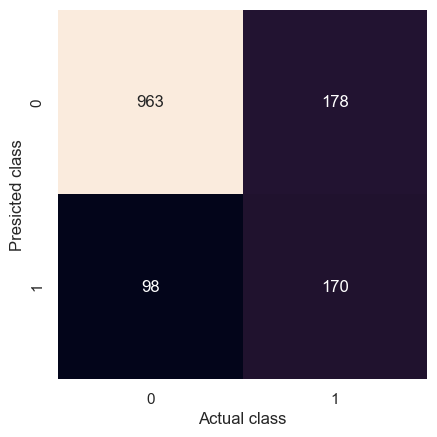

In [63]:
mat = confusion_matrix(y_test,churn_predictions)
sns.heatmap(mat.T,square=True,annot =True,fmt ='d',cbar=False)
plt.xlabel("Actual class")
plt.ylabel("Presicted class")